<a href="https://colab.research.google.com/github/YakshRathod/NULLCLASS-Internship/blob/Task-2/Task2_Cross_attention_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/500] Batch 10/10 | D Loss: 0.3046 | G Loss: 0.5640


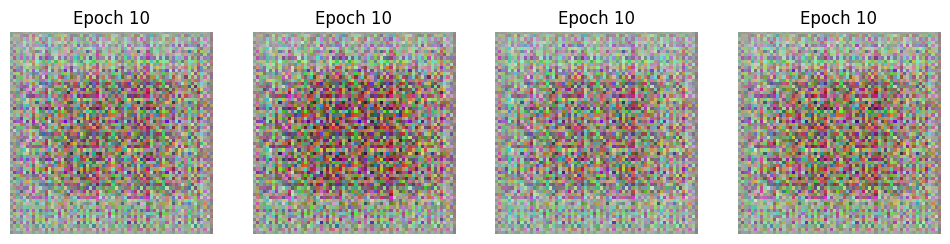

Epoch [20/500] Batch 10/10 | D Loss: 0.1979 | G Loss: 0.7719


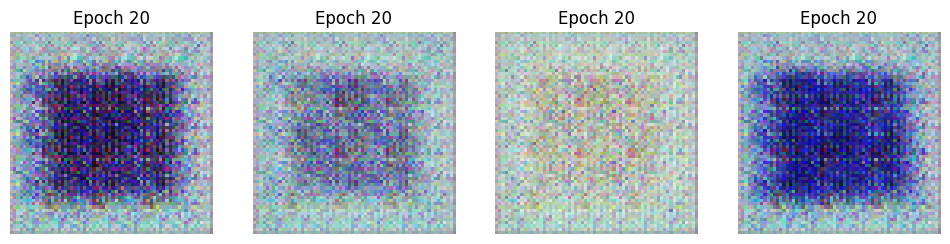

Epoch [30/500] Batch 10/10 | D Loss: 0.1783 | G Loss: 0.3487


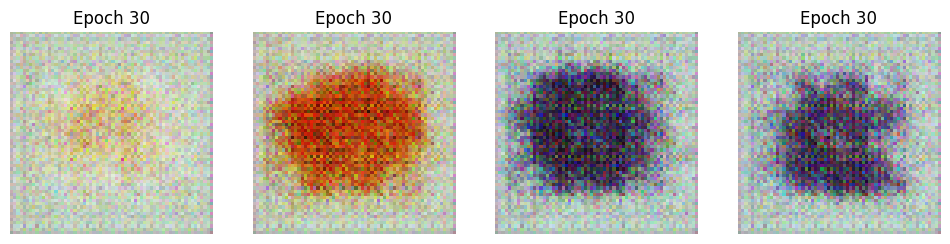

Epoch [40/500] Batch 10/10 | D Loss: 0.2225 | G Loss: 0.2393


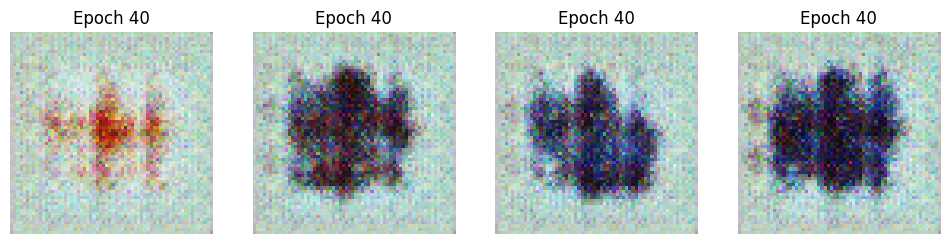

Epoch [50/500] Batch 10/10 | D Loss: 0.1557 | G Loss: 0.4642


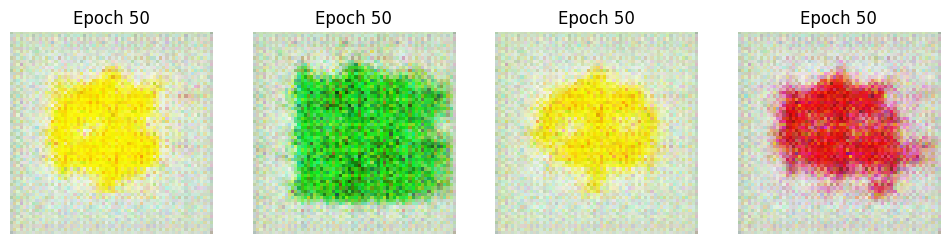

Epoch [60/500] Batch 10/10 | D Loss: 0.1889 | G Loss: 0.5468


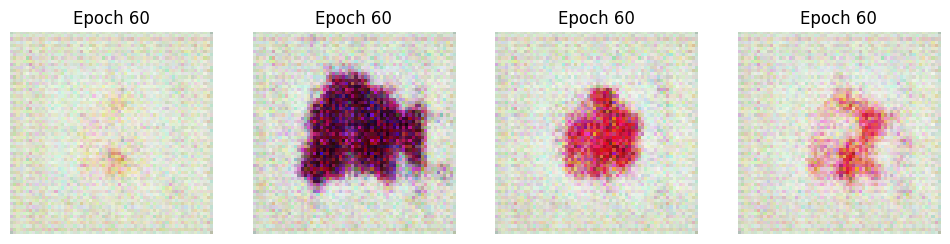

Epoch [70/500] Batch 10/10 | D Loss: 0.1850 | G Loss: 0.2940


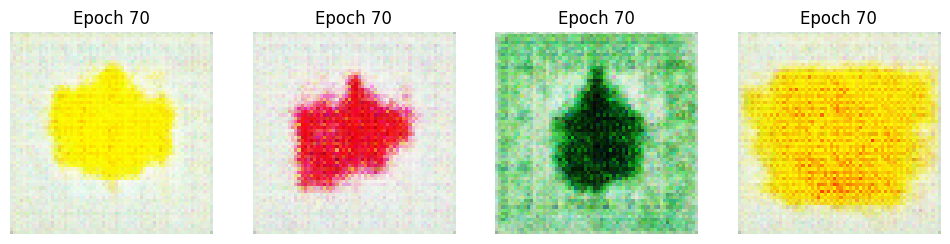

Epoch [80/500] Batch 10/10 | D Loss: 0.1494 | G Loss: 0.5098


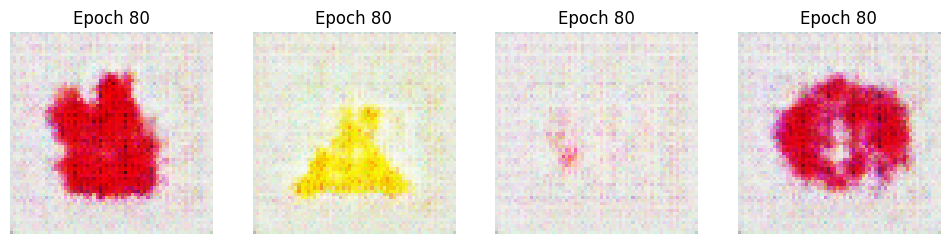

Epoch [90/500] Batch 10/10 | D Loss: 0.1766 | G Loss: 0.2965


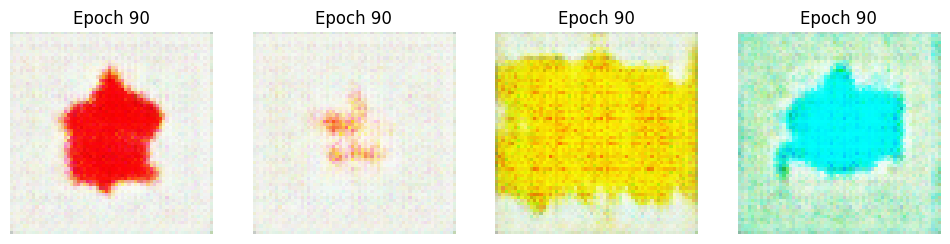

Epoch [100/500] Batch 10/10 | D Loss: 0.1323 | G Loss: 0.6823


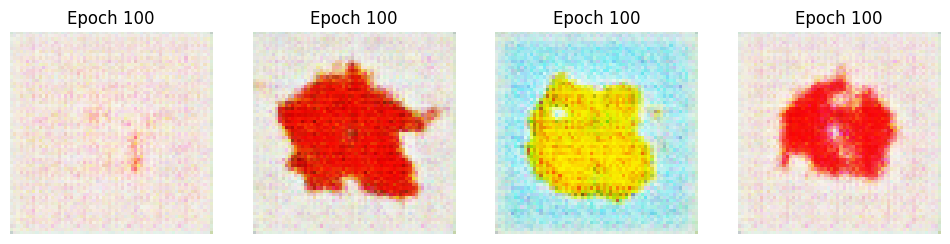

Epoch [110/500] Batch 10/10 | D Loss: 0.1687 | G Loss: 0.5682


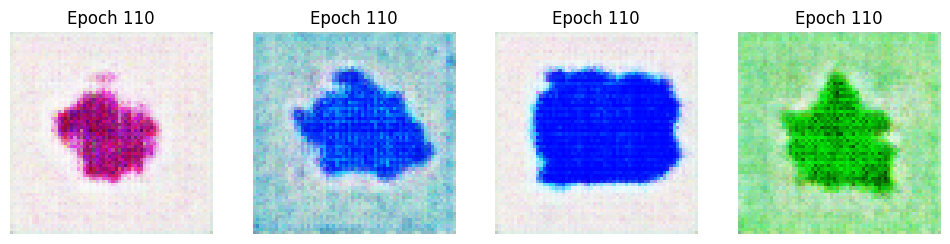

Epoch [120/500] Batch 10/10 | D Loss: 0.2239 | G Loss: 0.4466


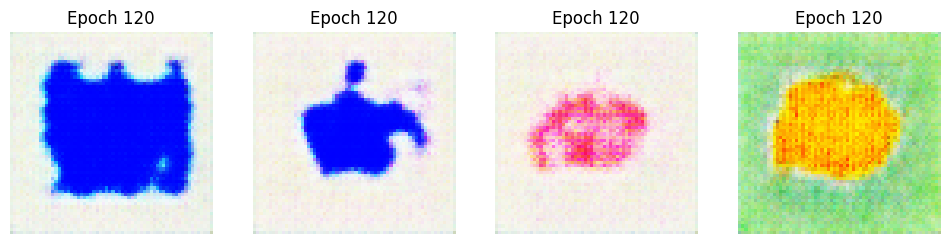

Epoch [130/500] Batch 10/10 | D Loss: 0.2187 | G Loss: 0.7414


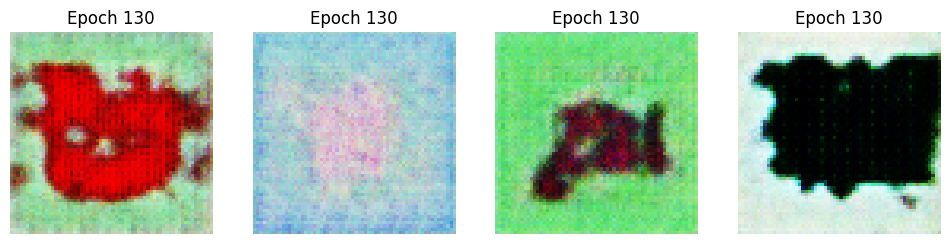

Epoch [140/500] Batch 10/10 | D Loss: 0.1584 | G Loss: 0.2262


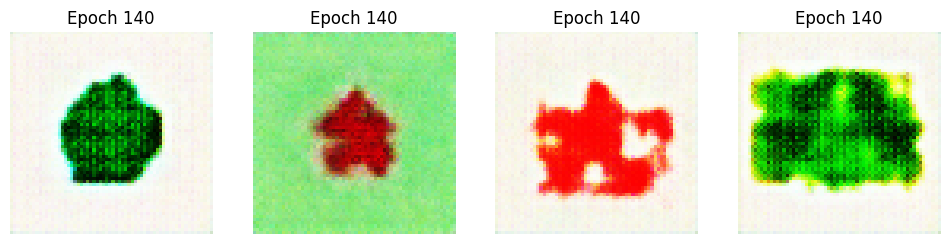

Epoch [150/500] Batch 10/10 | D Loss: 0.1447 | G Loss: 0.3969


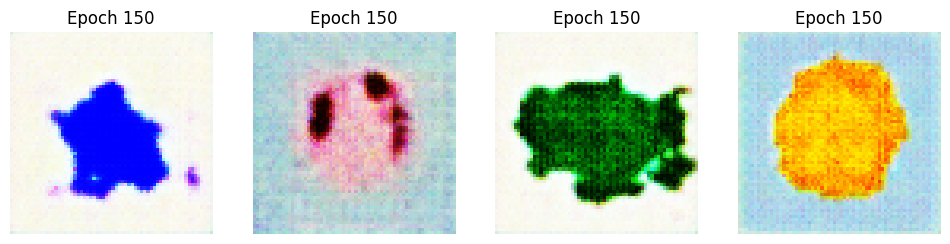

Epoch [160/500] Batch 10/10 | D Loss: 0.1174 | G Loss: 0.7535


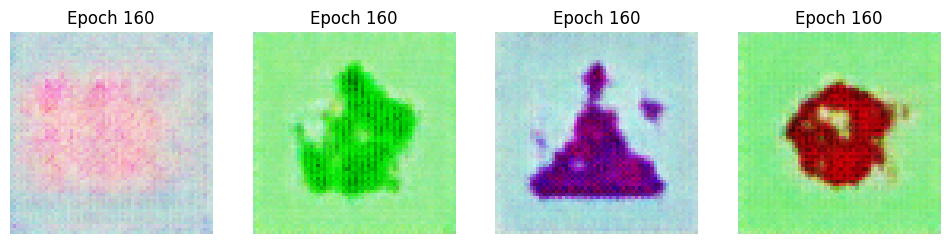

Epoch [170/500] Batch 10/10 | D Loss: 0.1430 | G Loss: 0.2926


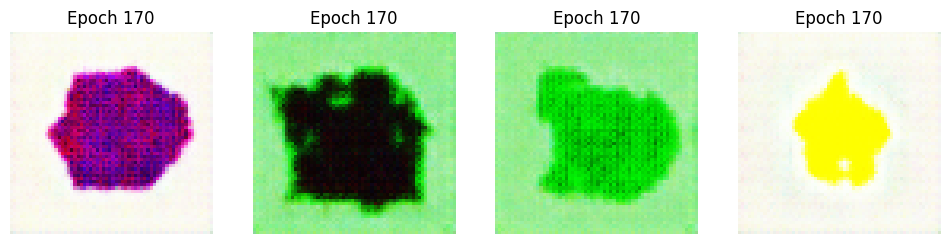

Epoch [180/500] Batch 10/10 | D Loss: 0.1748 | G Loss: 0.3284


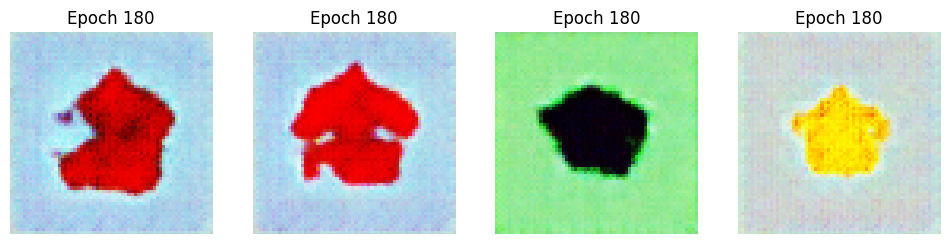

Epoch [190/500] Batch 10/10 | D Loss: 0.1855 | G Loss: 0.1876


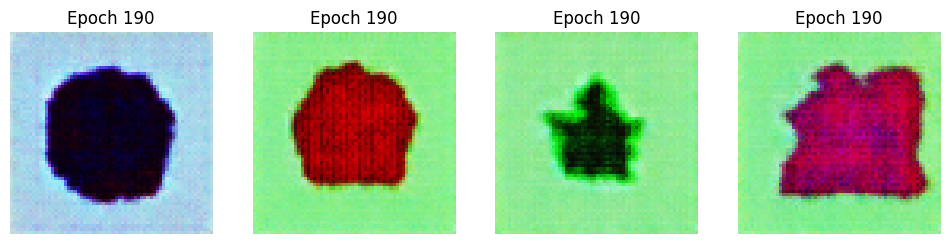

Epoch [200/500] Batch 10/10 | D Loss: 0.1510 | G Loss: 0.4801


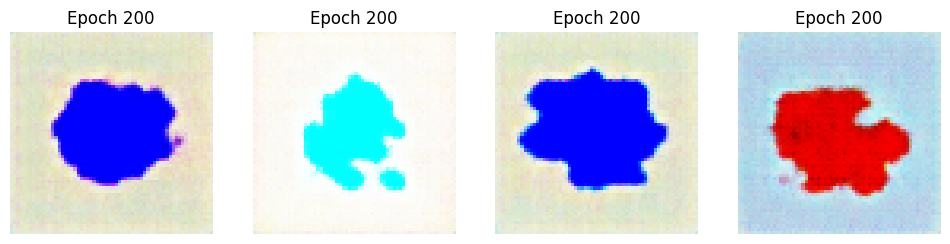

Epoch [210/500] Batch 10/10 | D Loss: 0.1175 | G Loss: 0.4531


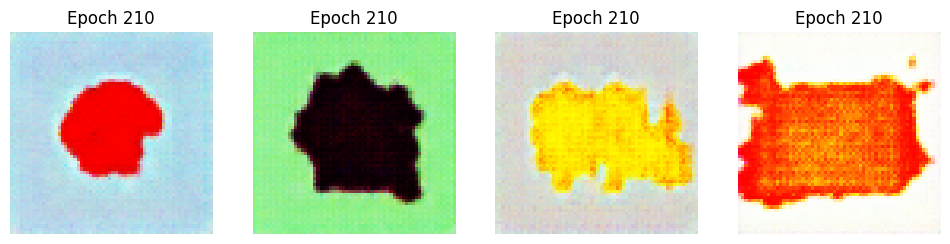

Epoch [220/500] Batch 10/10 | D Loss: 0.1247 | G Loss: 0.4943


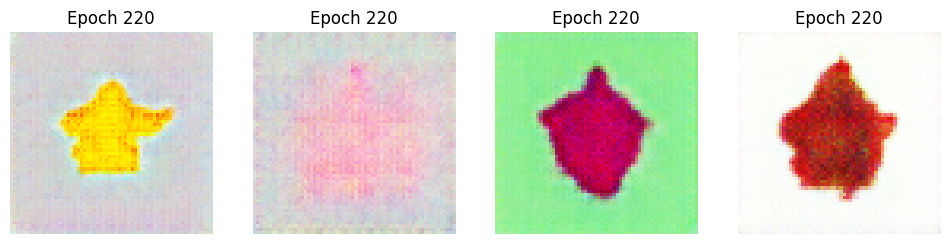

Epoch [230/500] Batch 10/10 | D Loss: 0.1532 | G Loss: 0.3068


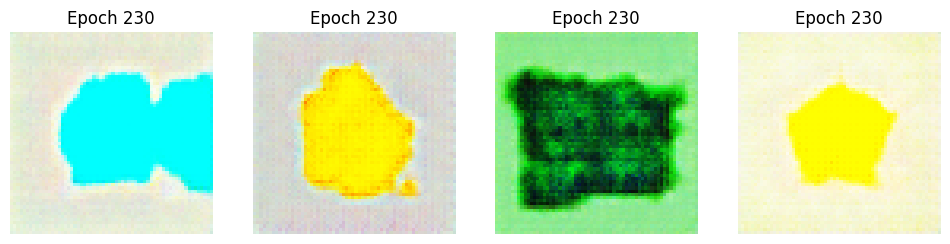

Epoch [240/500] Batch 10/10 | D Loss: 0.1721 | G Loss: 0.3246


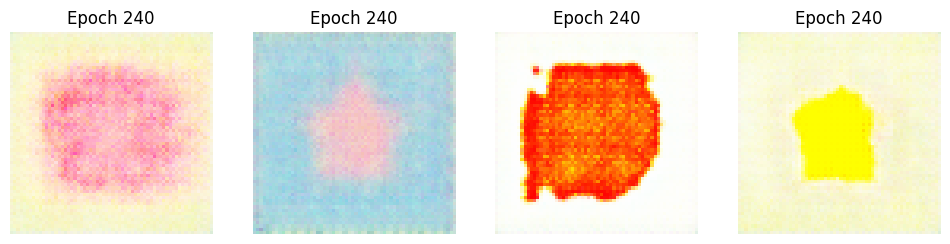

Epoch [250/500] Batch 10/10 | D Loss: 0.1494 | G Loss: 0.3789


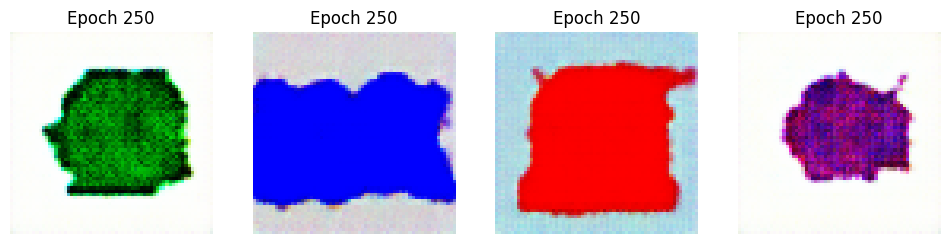

Epoch [260/500] Batch 10/10 | D Loss: 0.1112 | G Loss: 0.6510


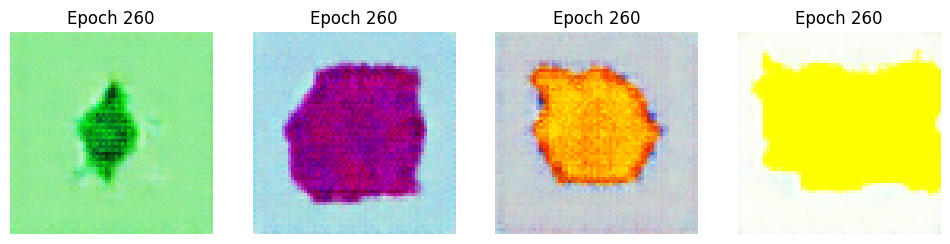

Epoch [270/500] Batch 10/10 | D Loss: 0.1372 | G Loss: 0.4695


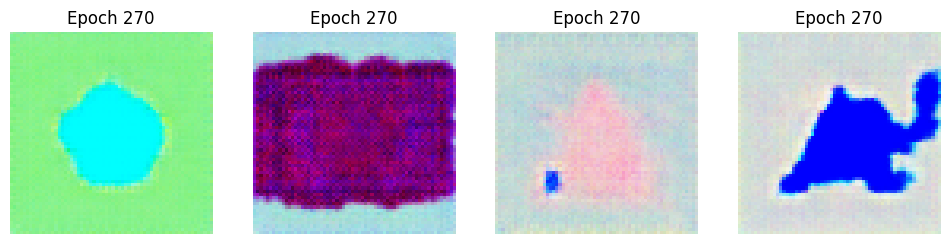

Epoch [280/500] Batch 10/10 | D Loss: 0.1093 | G Loss: 0.4126


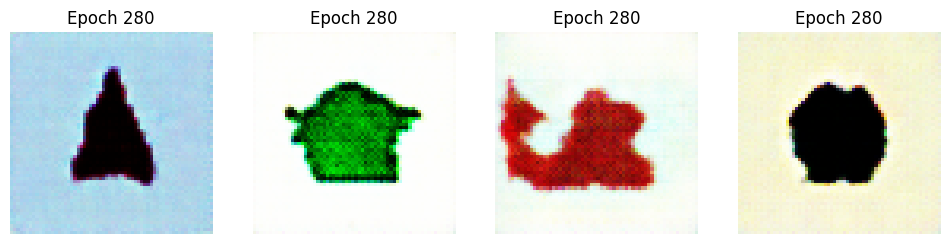

Epoch [290/500] Batch 10/10 | D Loss: 0.1132 | G Loss: 0.4147


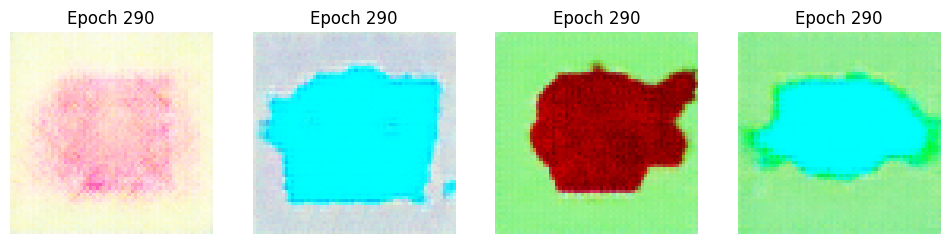

Epoch [300/500] Batch 10/10 | D Loss: 0.1200 | G Loss: 0.6476


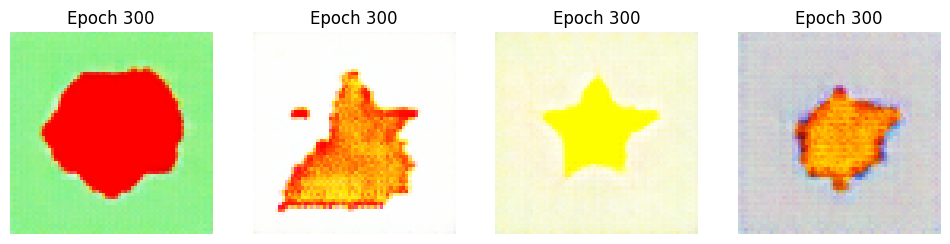

Epoch [310/500] Batch 10/10 | D Loss: 0.1067 | G Loss: 0.6575


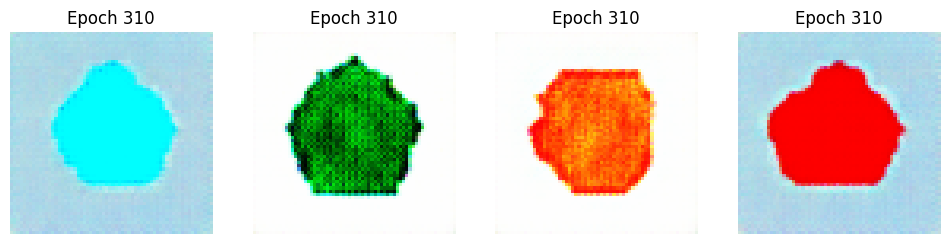

Epoch [320/500] Batch 10/10 | D Loss: 0.0889 | G Loss: 0.5586


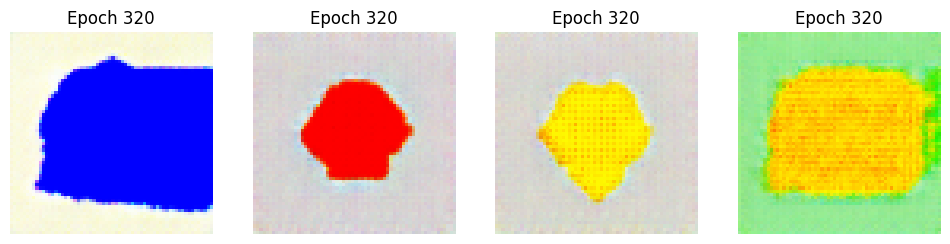

Epoch [330/500] Batch 10/10 | D Loss: 0.1417 | G Loss: 0.5711


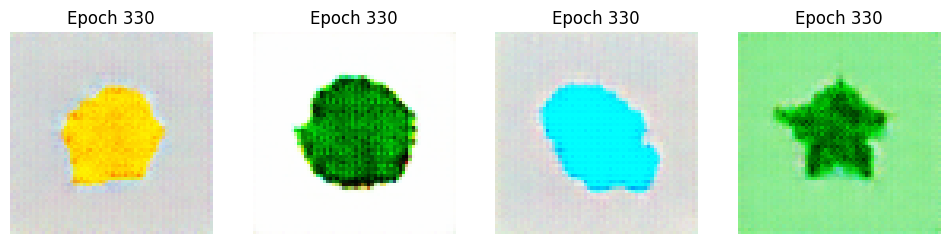

Epoch [340/500] Batch 10/10 | D Loss: 0.1115 | G Loss: 0.6664


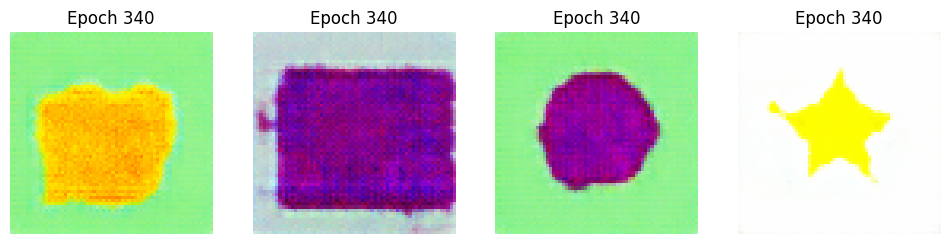

Epoch [350/500] Batch 10/10 | D Loss: 0.1323 | G Loss: 0.3491


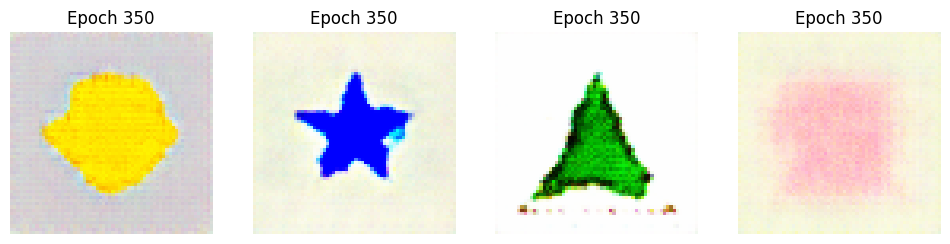

Epoch [360/500] Batch 10/10 | D Loss: 0.0797 | G Loss: 0.5859


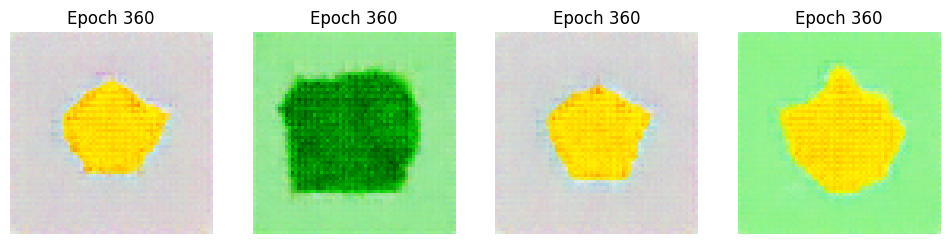

Epoch [370/500] Batch 10/10 | D Loss: 0.1011 | G Loss: 0.6196


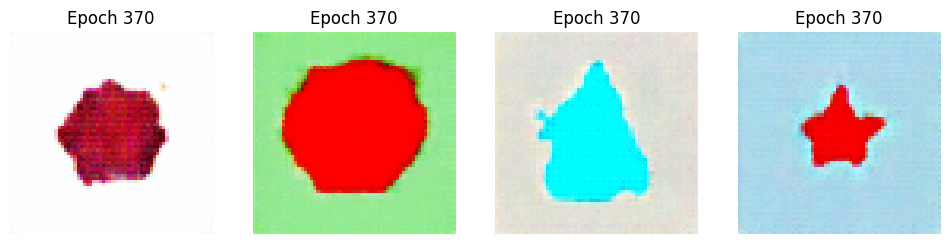

Epoch [380/500] Batch 10/10 | D Loss: 0.0811 | G Loss: 0.6664


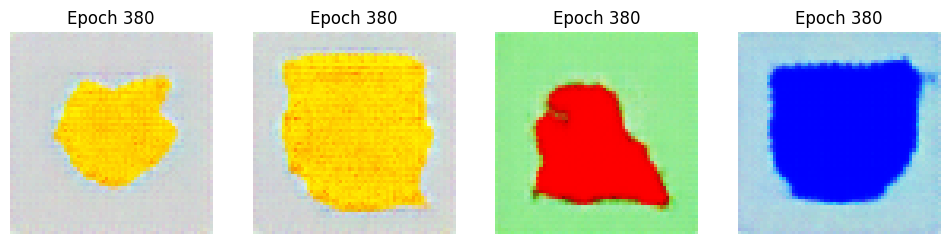

Epoch [390/500] Batch 10/10 | D Loss: 0.1015 | G Loss: 0.4824


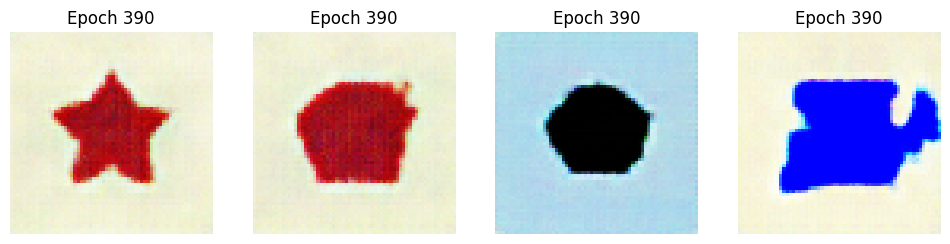

Epoch [400/500] Batch 10/10 | D Loss: 0.0970 | G Loss: 0.8286


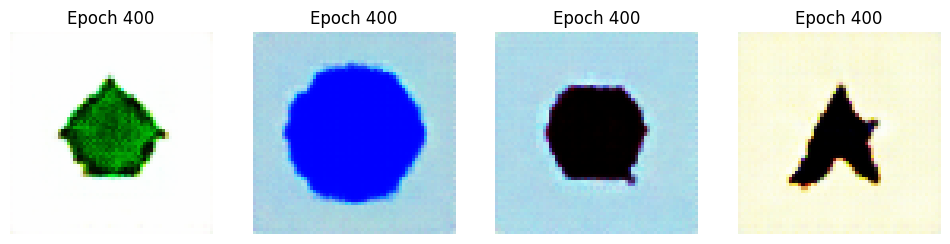

Epoch [410/500] Batch 10/10 | D Loss: 0.1170 | G Loss: 0.4784


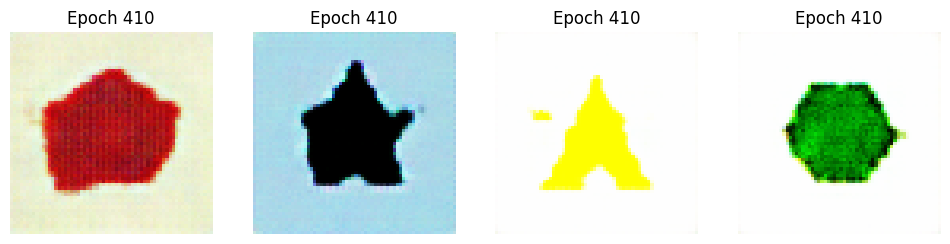

Epoch [420/500] Batch 10/10 | D Loss: 0.0711 | G Loss: 0.8265


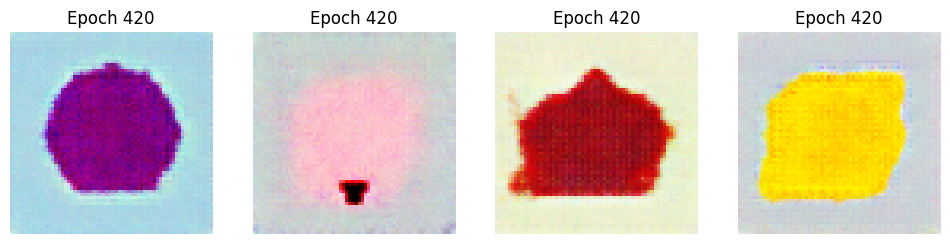

Epoch [430/500] Batch 10/10 | D Loss: 0.0763 | G Loss: 0.7083


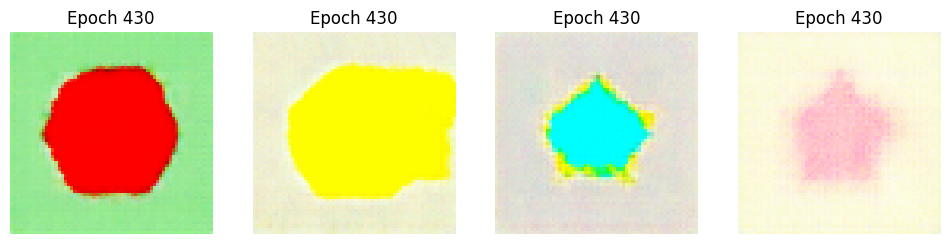

Epoch [440/500] Batch 10/10 | D Loss: 0.0690 | G Loss: 0.6610


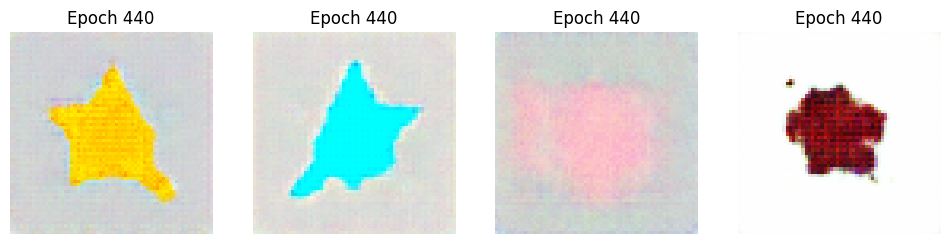

Epoch [450/500] Batch 10/10 | D Loss: 0.0780 | G Loss: 0.7355


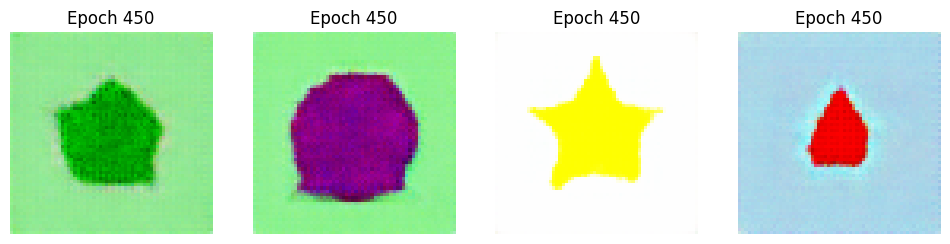

Epoch [460/500] Batch 10/10 | D Loss: 0.0580 | G Loss: 0.6550


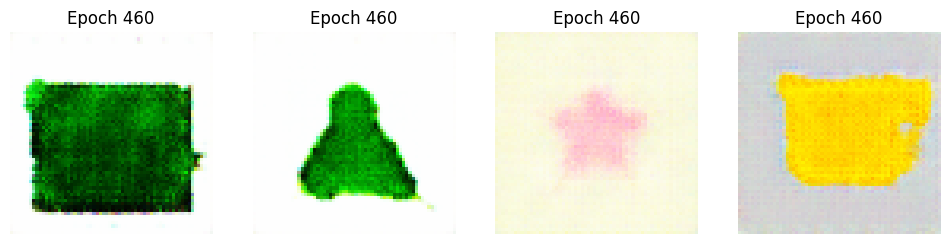

Epoch [470/500] Batch 10/10 | D Loss: 0.1048 | G Loss: 0.9412


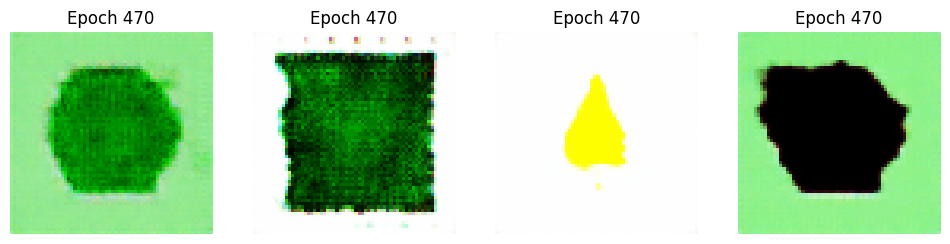

Epoch [480/500] Batch 10/10 | D Loss: 0.0620 | G Loss: 0.8823


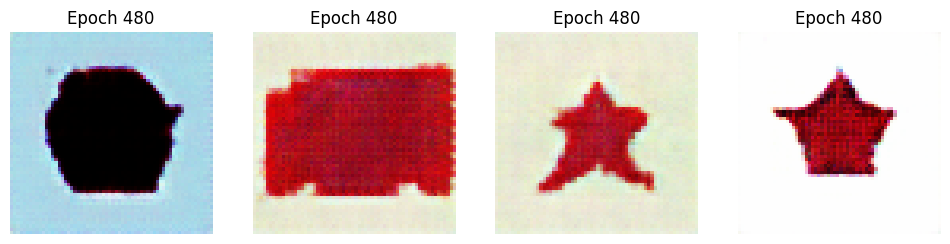

Epoch [490/500] Batch 10/10 | D Loss: 0.0931 | G Loss: 0.7296


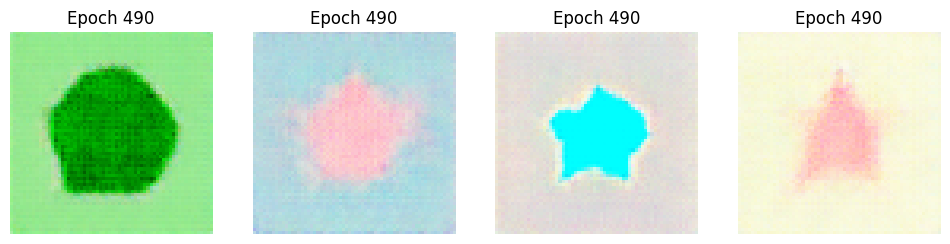

Epoch [500/500] Batch 10/10 | D Loss: 0.0522 | G Loss: 0.6573


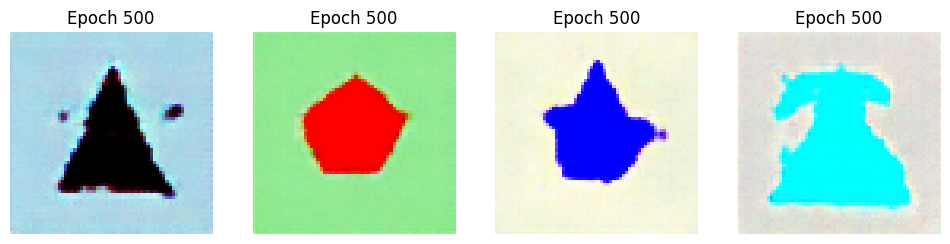

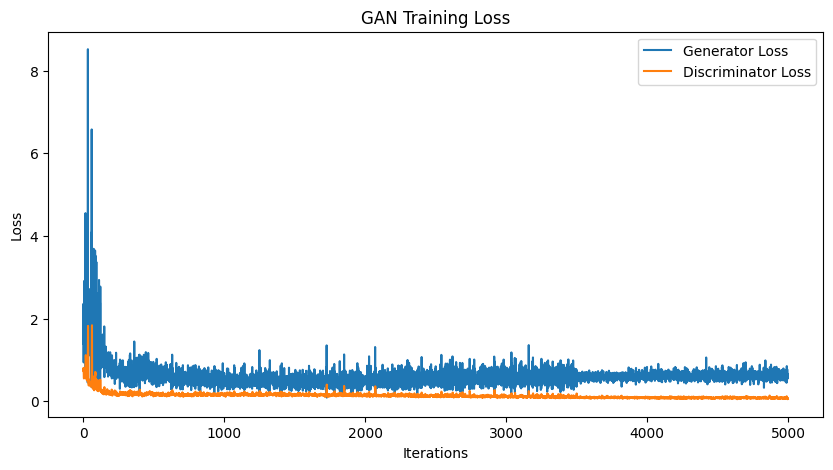

Training complete!


In [1]:
import os, random, numpy as np
from PIL import Image
from glob import glob
import torch
import torch.nn as nn
import torch.nn.utils as utils
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# ---- Cross-Attention Block ----
class CrossAttention2d(nn.Module):
    def __init__(self, img_feat_dim, txt_feat_dim):
        super().__init__()
        self.img_proj = nn.Linear(img_feat_dim, img_feat_dim)
        self.txt_proj = nn.Linear(txt_feat_dim, img_feat_dim)
        self.scale = img_feat_dim ** -0.5

    def forward(self, img_feats, txt_embeds):
        B, C, H, W = img_feats.shape
        img_flat = img_feats.view(B, C, H*W).permute(0, 2, 1)
        img_proj = self.img_proj(img_flat)
        txt_proj = self.txt_proj(txt_embeds)
        attn = (img_proj @ txt_proj.transpose(1, 2)) * self.scale
        attn_weights = torch.softmax(attn, dim=-1)
        txt_context = attn_weights @ txt_proj
        txt_context = txt_context.permute(0,2,1).view(B, C, H, W)
        return img_feats + txt_context

class SimpleTokenizer:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
    def build_vocab(self, captions):
        words = set()
        for cap in captions:
            words.update(cap.lower().split())
        self.word2idx = {word: idx+1 for idx, word in enumerate(sorted(words))}
        self.word2idx['<PAD>'] = 0
        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
    def encode(self, text, max_len=10):
        tokens = [self.word2idx.get(w, 0) for w in text.lower().split()]
        tokens += [0] * (max_len-len(tokens))
        return tokens[:max_len]

class TextImageDataset(Dataset):
    def __init__(self, dataset_path, tokenizer, image_size=(64,64)):
        self.image_files = sorted([f for f in glob(os.path.join(dataset_path, "*.png"))])
        self.captions = [f.replace(".png",".txt") for f in self.image_files]
        self.image_size = image_size
        self.tokenizer = tokenizer
    def __len__(self): return len(self.image_files)
    def __getitem__(self, idx):
        img = Image.open(self.image_files[idx]).convert("RGB").resize(self.image_size)
        img_tensor = torch.tensor(np.array(img)/127.5-1.0, dtype=torch.float32).permute(2,0,1)
        with open(self.captions[idx], "r") as f:
            caption = f.read().strip()
        tokens = torch.tensor(self.tokenizer.encode(caption), dtype=torch.long)
        return img_tensor, tokens

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.Linear)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)

# ---- Generator with Cross-Attention ----
class Generator(nn.Module):
    def __init__(self, z_dim, embed_dim, vocab_size, img_channels=3):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Sequential(
            nn.Linear(z_dim + embed_dim, 1024*4*4),
            nn.BatchNorm1d(1024*4*4),
            nn.ReLU(True)
        )
        self.up1 = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
        )
        self.ca1 = CrossAttention2d(512, embed_dim)
        self.up2 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
        )
        self.ca2 = CrossAttention2d(256, embed_dim)
        self.up3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
        )
        self.ca3 = CrossAttention2d(128, embed_dim)
        self.final = nn.Sequential(
            nn.ConvTranspose2d(128, img_channels, 4, 2, 1),
            nn.Tanh()
        )
    def forward(self, z, captions):
        cap_embed = self.embed(captions)      # [B, L, E]
        cap_mean = cap_embed.mean(dim=1)      # [B, E]
        x = torch.cat([z, cap_mean], dim=1)
        x = self.fc(x).view(x.size(0), 1024, 4, 4)
        x = self.up1(x)
        x = self.ca1(x, cap_embed)
        x = self.up2(x)
        x = self.ca2(x, cap_embed)
        x = self.up3(x)
        x = self.ca3(x, cap_embed)
        x = self.final(x)
        return x

# ---- Discriminator ----
class Discriminator(nn.Module):
    def __init__(self, embed_dim, vocab_size, img_channels=3):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.img_layers = nn.Sequential(
            utils.spectral_norm(nn.Conv2d(img_channels, 64, 4, 2, 1)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),
            utils.spectral_norm(nn.Conv2d(64, 128, 4, 2, 1)),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),
            utils.spectral_norm(nn.Conv2d(128, 256, 4, 2, 1)),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),
            utils.spectral_norm(nn.Conv2d(256, 512, 4, 2, 1)),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),
        )
        self.fc = None
        self._fixed_feat = None

    def forward(self, img, captions):
        cap_embed = self.embed(captions).mean(dim=1)
        noise_level = 0.02
        if self.training:
            img = img + noise_level * torch.randn_like(img)
        img_feat = self.img_layers(img)
        img_feat_flat = img_feat.view(img.size(0), -1)
        if self.fc is None:
            self._fixed_feat = img_feat_flat.shape[1]
            in_features = self._fixed_feat + cap_embed.shape[1]
            self.fc = utils.spectral_norm(nn.Linear(in_features, 1)).to(img.device)
        if img_feat_flat.shape[1] != self._fixed_feat:
            img_feat_flat = img_feat_flat[:, :self._fixed_feat]
        x = torch.cat([img_feat_flat, cap_embed], dim=1)
        return self.fc(x)

# ---- Training Setup and Loop ----
# Directory and settings (update as needed)
dataset_path = "/content/drive/MyDrive/Nullclass internship/Task 1/Shapes Dataset"
save_path = "/content/drive/MyDrive/Nullclass internship/Task 2/Results"
os.makedirs(save_path, exist_ok=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
image_size = 64
z_dim = 100
embed_dim = 128
batch_size = 128
epochs = 500
lr = 1e-4
SAMPLE_INTERVAL = 100

all_captions = [open(f, "r").read().strip() for f in glob(os.path.join(dataset_path, "*.txt"))]
tokenizer = SimpleTokenizer(); tokenizer.build_vocab(all_captions)
vocab_size = len(tokenizer.word2idx)
dataset = TextImageDataset(dataset_path, tokenizer, image_size=(image_size,image_size))
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

G = Generator(z_dim, embed_dim, vocab_size).to(device)
D = Discriminator(embed_dim, vocab_size).to(device)
G.apply(weights_init)
D.apply(weights_init)
opt_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.MSELoss()

def noisy_label(size): return torch.empty(size,1).uniform_(0.8, 1.0).to(device)

G_losses, D_losses = [], []
iteration = 0

for epoch in range(epochs):
    if epoch == int(epochs*0.7):
        for g in opt_G.param_groups: g['lr'] /= 3
        for d in opt_D.param_groups: d['lr'] /= 3
    for i, (real_imgs, captions) in enumerate(loader):
        real_imgs, captions = real_imgs.to(device), captions.to(device)
        batch_size_curr = real_imgs.size(0)
        valid = noisy_label(batch_size_curr)
        fake = torch.zeros(batch_size_curr,1, device=device)
        # Train D
        z = torch.randn(batch_size_curr, z_dim, device=device)
        fake_imgs = G(z, captions)
        D_real = D(real_imgs, captions)
        D_fake = D(fake_imgs.detach(), captions)
        loss_D = (criterion(D_real, valid) + criterion(D_fake, fake)) / 2
        opt_D.zero_grad(); loss_D.backward(); opt_D.step()
        # Train G
        D_fake = D(fake_imgs, captions)
        loss_G = criterion(D_fake, valid)
        opt_G.zero_grad(); loss_G.backward(); opt_G.step()
        G_losses.append(loss_G.item())
        D_losses.append(loss_D.item())
        iteration += 1
        if iteration % SAMPLE_INTERVAL == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {i+1}/{len(loader)} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")
            G.eval()
            with torch.no_grad():
                sample_bs = 4
                sample_z = torch.randn(sample_bs, z_dim, device=device)
                sample_idx = np.random.choice(len(captions), sample_bs, replace=False)
                sample_captions = captions[sample_idx]
                sample_imgs = G(sample_z, sample_captions).cpu()
            G.train()
            # Save images to disk
            for idx, img in enumerate(sample_imgs):
                img_out = ((img.permute(1,2,0)*0.5+0.5).clamp(0,1).numpy()*255).astype(np.uint8)
                img_out = Image.fromarray(img_out)
                fname = f"{save_path}/sample_epoch{epoch+1}_iter{iteration}_idx{idx}.png"
                img_out.save(fname)
            fig, axs = plt.subplots(1, 4, figsize=(12,3))
            for idx, img in enumerate(sample_imgs):
                axs[idx].imshow(((img.permute(1,2,0)*0.5+0.5).clamp(0,1)))
                axs[idx].set_title(f"Epoch {epoch+1}")
                axs[idx].axis('off')
            plt.show()

plt.figure(figsize=(10,5))
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Iterations"), plt.ylabel("Loss")
plt.title("GAN Training Loss"); plt.legend()
plt.show()
print("Training complete!")
